In [3]:
%load_ext autoreload
%autoreload 2
import gym
import torch
from torch import nn
import dqn
import pprint
from matplotlib import pyplot as plt

In [4]:
def run(agent, env):
    
    pprint.pprint(agent.__dict__)
    
    qnet, reward_history, loss_history = dqn.learn(env, agent)
    
    plt.plot(reward_history)
    plt.show()
    
    plt.plot(loss_history)
    plt.show()
    
    dqn.play(env, agent, qnet)
    
    env.close()
    return qnet, reward_history, loss_history


{'batch_size': 8,
 'demo_interval': 30,
 'discount': 0.99,
 'epochs': 1,
 'greedy_epsilon_decay': 0.1,
 'greedy_epsilon_max': 1.0,
 'greedy_epsilon_min': 0.0001,
 'log_interval': 1000,
 'n_batches': 4,
 'n_episodes': 300,
 'n_steps': 300000,
 'n_steps_to_start_training': 200,
 'optim_beta_m': 0.9,
 'optim_beta_v': 0.999,
 'optim_epsilon': 1e-08,
 'optim_lr': 0.001,
 'priority_alpha': 0,
 'priority_epsilon': 0,
 'softmax_temperature': 0.001,
 'store_size': 50000,
 'target_update_interval': 1,
 'timeout': 1000,
 'timeout_reward': -1000}
input:8, output:4
-----
step #1000, num episodes played: 6, store size: 1000 
loss: 1.9577181339263916, avg_reward last 6 episodes: -259.48220309267106
-----
step #2000, num episodes played: 12, store size: 2000 
loss: 9.927807807922363, avg_reward last 10 episodes: -354.0443083170179
-----
step #3000, num episodes played: 14, store size: 3000 
loss: 0.8311077952384949, avg_reward last 10 episodes: -320.8322180622612
-----
step #4000, num episodes played:

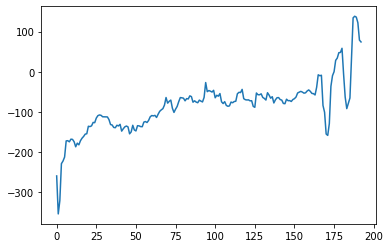

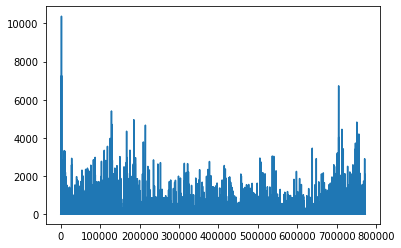

In [6]:
env = gym.make('LunarLander-v2')
# env = gym.make('CartPole-v0')

"""
agent = dqn.Agent(
    discount=0.99,
    softmax_temperature=1.,

    greedy_epsilon_max=1.0,
    greedy_epsilon_decay=0.1,
    greedy_epsilon_min=1e-4,
    priority_epsilon=0,
    priority_alpha=0,

    store_size=1 << 20,
    n_steps=100000,
    target_update_interval=4000,
    n_steps_to_start_training=1000,

    log_interval=1000,
    demo_interval=10,

    learning_rate=5e-4,

    batch_size=1 << 6,
    epochs=1, # descend iterations each batch
)
"""

agent = dqn.Agent(
    discount=0.99,
    softmax_temperature=0.001,

    greedy_epsilon_max=1.0,
    greedy_epsilon_decay=0.1,
    greedy_epsilon_min=1e-4,
    priority_epsilon=0,
    priority_alpha=0,

    store_size=50000,
    n_steps=300000,
    n_episodes=300,

    target_update_interval=1,
    n_steps_to_start_training=200,

    log_interval=1000,
    demo_interval=30,

    timeout=1000,
    timeout_reward=-1000,

    optim_lr=1e-3,
    optim_beta_m=0.9,
    optim_beta_v=0.999,
    optim_epsilon=1e-8,
    
    n_batches=4,
    batch_size=8,
    epochs=1, # descend iterations each batch
)

qnet, reward_history, loss_history = run(agent, env)

In [14]:
dqn.play(env, agent, qnet, render=True)

[3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 1, 3, 1, 3, 2, 1, 2, 2, 2, 1, 3, 2, 2, 1, 2, 2, 3, 2, 1, 2, 2, 3, 1, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 1, 2, 2, 3, 1, 3, 2, 2, 1, 3, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 3, 1, 2, 1, 3, 2, 2, 2, 1, 3, 2, 2, 1, 3, 2, 2, 2, 3, 1, 2, 1, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 3, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0]


-150.14139755602326

In [15]:
from datetime import datetime
now = datetime.now().strftime("%Y-%m-%d-%H-%M")
torch.save(qnet.state_dict(), './models/LunarLander-v2-' + now)
print(now)

2020-06-04-00-40


In [16]:
qnet = nn.Sequential(
        nn.Linear(8, 256),
        nn.ReLU(),
        nn.Linear(256, 4)
    )
qnet.load_state_dict(torch.load('./models/LunarLander-v2-' + '2020-06-04-00-40'))
qnet.eval()

Sequential(
  (0): Linear(in_features=8, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=4, bias=True)
)

In [18]:
agent = dqn.Agent(
    discount=0.99,
    softmax_temperature=0.001,

    greedy_epsilon_max=1.0,
    greedy_epsilon_decay=0.1,
    greedy_epsilon_min=1e-4,
    priority_epsilon=0,
    priority_alpha=0,

    store_size=50000,
    n_steps=300000,
    n_episodes=300,

    target_update_interval=1,
    n_steps_to_start_training=200,

    log_interval=1000,
    demo_interval=30,

    timeout=1000,
    timeout_reward=-1000,

    optim_lr=0.001,
    optim_beta_m=0.9,
    optim_beta_v=0.999,
    optim_epsilon=1e-8,
    
    n_batches=4,
    batch_size=8,
    epochs=1, # descend iterations each batch
)
env = gym.make('LunarLander-v2')
dqn.play(env, agent, qnet, render=True)

[0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 3, 2, 2, 2, 3, 1, 3, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 0, 2, 2, 2, 1, 3, 2, 2, 3, 2, 1, 3, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 3, 2, 2, 2, 1, 2, 1, 3, 2, 1, 3, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 2, 3, 2, 1, 3, 2, 2, 2, 2, 1, 3, 2, 1, 3, 2, 2, 2, 2, 2, 1, 3, 2, 2, 3, 2, 1, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


-361.44041106090026